In [248]:
import os 
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from scipy.stats import t #https://towardsdatascience.com/how-to-calculate-confidence-intervals-in-python-a8625a48e62b

#Increase text size
plt.rcParams.update({'font.size': 15})

In [249]:
def listdir_fullpath(d):
    return [os.path.join(d, f) for f in os.listdir(d)]

def getConfidenceInterval(percentage, data):
    n = len(data)
    m = np.mean(data)
    s = np.std(data)
    t_crit = np.abs(t.ppf((1-percentage)/2,n))
    interval = t_crit * s / np.sqrt(n)
    return m - interval, m + interval

class simulationBatch:
    def __init__(self, simulationFolder):
        self.droneNumber = int(simulationFolder.split("\\")[-1])
        self.getSimulations(simulationFolder)

    def getSimulations(self, simulationFolder):
        self.simulationFiles = listdir_fullpath(simulationFolder)
        self.inspectionTimes = []
        self.simulationTimes = []
        self.collisionNumbers = []
        self.paretoPoints = []
        for file in self.simulationFiles:
            #index = int(file)
            with open(file, "r") as txt_file:
                line = txt_file.readlines()[0]
            inspectionTime = float(line.split("/")[1])
            collisionNumber = int(line.split("/")[3])
            self.inspectionTimes.append(inspectionTime)
            self.simulationTimes.append(float(line.split("/")[2]))
            self.collisionNumbers.append(collisionNumber)
            self.paretoPoints.append(np.array([inspectionTime, collisionNumber]))
        
        self.inspectionTimes = np.array(self.inspectionTimes)
        self.simulationTimes = np.array(self.simulationTimes)
        self.collisionNumbers = np.array(self.collisionNumbers)
        self.paretoPoints = np.array(self.paretoPoints)

        self.inspectionTimeAverage = np.mean(self.inspectionTimes)
        self.simulationTimeAverage = np.mean(self.simulationTimes)
        self.collisionNumberAverage = np.mean(self.collisionNumbers)
        self.inspectionTimeBottom, self.inspectionTimeTop = getConfidenceInterval(0.99, self.inspectionTimes)

        self.inspectionTimeStd = np.std(self.inspectionTimes)
        self.inspectionTimeBottomStd = self.inspectionTimeAverage - self.inspectionTimeStd
        self.inspectionTimeTopStd = self.inspectionTimeAverage + self.inspectionTimeStd

        self.collisionNumbersBottom, self.collisionNumbersTop = getConfidenceInterval(0.99, self.collisionNumbers)
        self.collisionNumberStd = np.std(self.collisionNumbers)
        self.collisionNumberBottomStd = self.collisionNumberAverage - self.collisionNumberStd
        self.collisionNumberTopStd = self.collisionNumberAverage + self.collisionNumberStd

In [250]:
print(os.getcwd())
my_list = listdir_fullpath(os.path.join(os.getcwd(), '2,30'))

print(my_list)

d:\Github\Swarm-of-Inspection-Drones\Simulation processing
['d:\\Github\\Swarm-of-Inspection-Drones\\Simulation processing\\2,30\\10', 'd:\\Github\\Swarm-of-Inspection-Drones\\Simulation processing\\2,30\\11', 'd:\\Github\\Swarm-of-Inspection-Drones\\Simulation processing\\2,30\\12', 'd:\\Github\\Swarm-of-Inspection-Drones\\Simulation processing\\2,30\\13', 'd:\\Github\\Swarm-of-Inspection-Drones\\Simulation processing\\2,30\\14', 'd:\\Github\\Swarm-of-Inspection-Drones\\Simulation processing\\2,30\\15', 'd:\\Github\\Swarm-of-Inspection-Drones\\Simulation processing\\2,30\\16', 'd:\\Github\\Swarm-of-Inspection-Drones\\Simulation processing\\2,30\\17', 'd:\\Github\\Swarm-of-Inspection-Drones\\Simulation processing\\2,30\\18', 'd:\\Github\\Swarm-of-Inspection-Drones\\Simulation processing\\2,30\\19', 'd:\\Github\\Swarm-of-Inspection-Drones\\Simulation processing\\2,30\\2', 'd:\\Github\\Swarm-of-Inspection-Drones\\Simulation processing\\2,30\\20', 'd:\\Github\\Swarm-of-Inspection-Drones\\

In [251]:
simulationBatches = []
for i in my_list:
    simulationBatches.append(simulationBatch(i))

#sort the batches by drone number
simulationBatches.sort(key=lambda x: x.droneNumber)

#for each batch, print the average inspection time, average simulation time, and average collision number
for i in simulationBatches:
    print(i.droneNumber, i.inspectionTimeAverage, i.simulationTimeAverage, i.collisionNumberAverage)

2 572.3162376237624 6.331779910891089 9.257425742574258
3 395.2658049504951 5.2149018217821785 11.554455445544555
4 301.6856663366337 4.637337594059406 11.851485148514852
5 249.0900633663366 4.480294762376238 13.534653465346535
6 213.59996336633657 4.442218495049505 17.06930693069307
7 188.76920792079207 4.4907179009900995 20.81188118811881
8 170.14080297029702 4.707514752475248 24.712871287128714
9 155.25790099009902 4.73569008910891 28.97029702970297
10 144.8855386138614 4.880743326732674 32.851485148514854
11 137.00310396039606 5.052850415841585 38.24752475247525
12 129.95344356435646 5.239306217821781 47.89108910891089
13 124.95437722772279 5.486028415841584 54.257425742574256
14 120.33292871287131 5.6788367128712895 59.07920792079208
15 117.50852079207924 5.914381613861385 66.7128712871287
16 114.7049940594059 6.1653775643564375 75.10891089108911
17 112.4294663366337 6.3596361287128715 84.01980198019803
18 110.72232475247527 6.600895346534654 92.89108910891089
19 109.3726871287128

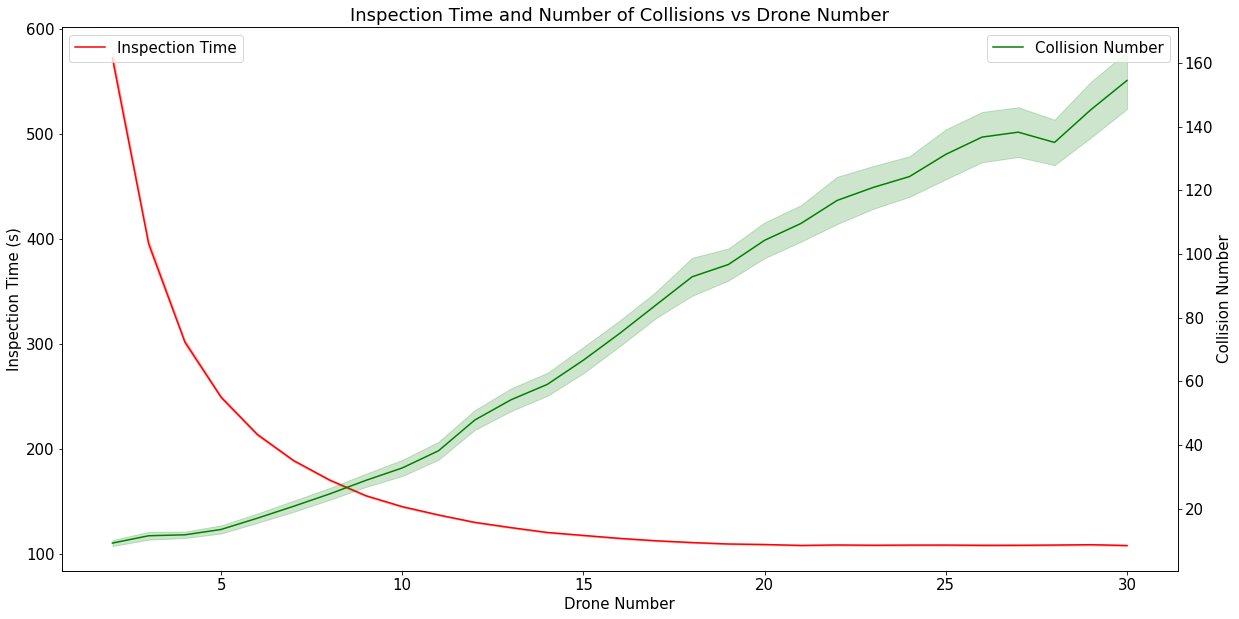

In [252]:
#plot the average inspection time, average simulation time, and average collision number

fig0 = plt.figure(figsize=(20,10))
ax0 = fig0.add_subplot(111)
ax1 = ax0.twinx()

ax0.plot([i.droneNumber for i in simulationBatches], [i.inspectionTimeAverage for i in simulationBatches], 'r', label = "Inspection Time")
#fill inbetween the confidence interval
ax0.fill_between([i.droneNumber for i in simulationBatches], [i.inspectionTimeBottom for i in simulationBatches], [i.inspectionTimeTop for i in simulationBatches], alpha=0.2, color = "red")
#plt.plot([i.droneNumber for i in simulationBatches], [i.simulationTimeAverage for i in simulationBatches], 'bo')
ax1.plot([i.droneNumber for i in simulationBatches], [i.collisionNumberAverage for i in simulationBatches], 'g', label = "Collision Number")
ax1.fill_between([i.droneNumber for i in simulationBatches], [i.collisionNumbersBottom for i in simulationBatches], [i.collisionNumbersTop for i in simulationBatches], alpha=0.2, color = "green")

#generate legend
ax0.legend(loc='upper left')
ax1.legend(loc='upper right')
#set x title
ax0.set_xlabel("Drone Number")
#set y title
ax0.set_ylabel("Inspection Time (s)")
ax1.set_ylabel("Collision Number")
#set title
ax0.set_title("Inspection Time and Number of Collisions vs Drone Number")

#save figure
fig0.savefig("inspectionTimeAndCollisionNumber.png")

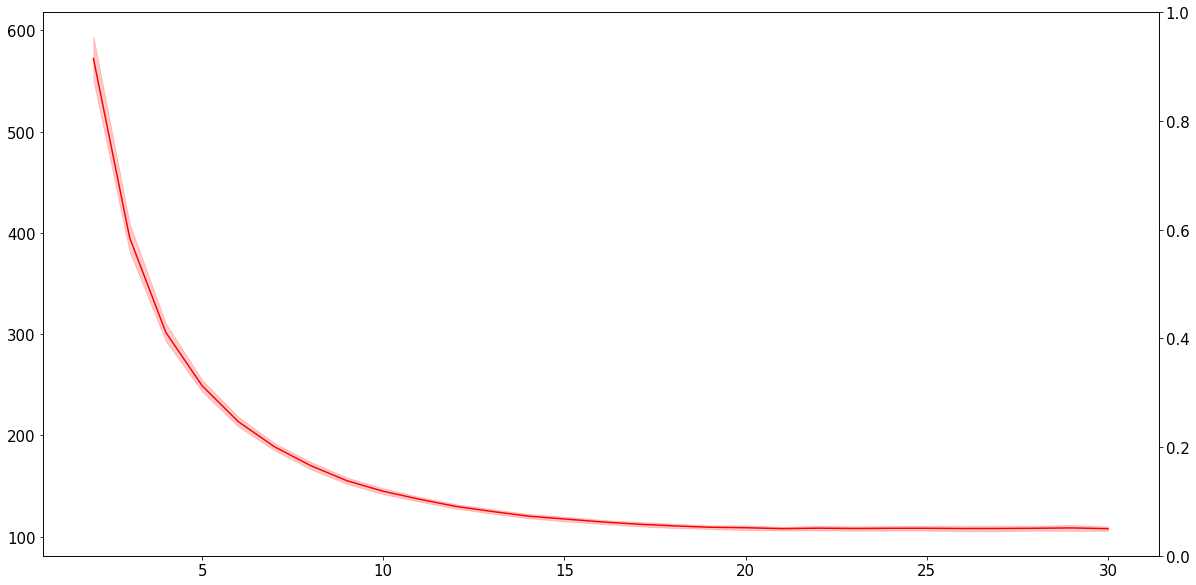

In [253]:
#plot the average inspection time, average simulation time, and average collision number

fig0 = plt.figure(figsize=(20,10))
ax0 = fig0.add_subplot(111)
ax1 = ax0.twinx()

ax0.plot([i.droneNumber for i in simulationBatches], [i.inspectionTimeAverage for i in simulationBatches], 'r')
#fill inbetween the confidence interval
ax0.fill_between([i.droneNumber for i in simulationBatches], [i.inspectionTimeBottomStd for i in simulationBatches], [i.inspectionTimeTopStd for i in simulationBatches], alpha=0.2, color = "red")
#plt.plot([i.droneNumber for i in simulationBatches], [i.simulationTimeAverage for i in simulationBatches], 'bo')
#ax1.plot([i.droneNumber for i in simulationBatches], [i.collisionNumberAverage for i in simulationBatches], 'g')
#ax1.fill_between([i.droneNumber for i in simulationBatches], [i.collisionNumberBottomStd for i in simulationBatches], [i.collisionNumberTopStd for i in simulationBatches], alpha=0.2, color = "green")


Text(0.5, 1.0, 'Pareto Points')

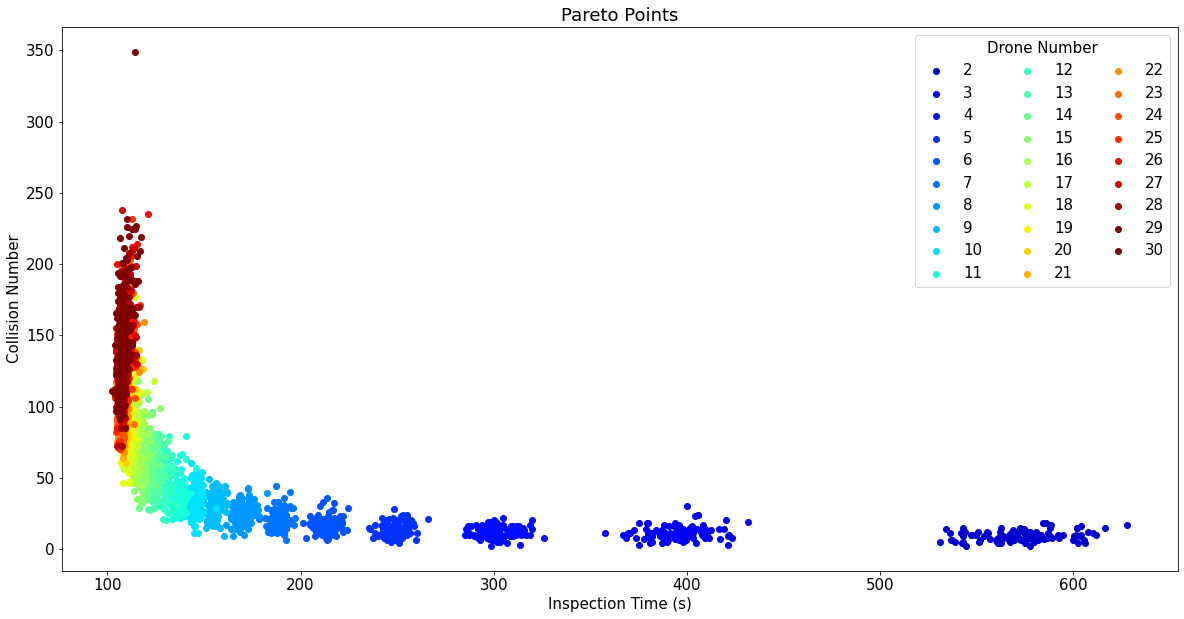

In [274]:
#make a new figure
fig1 = plt.figure(figsize=(20,10))
ax2 = fig1.add_subplot(111)

#create a list of colors for every drone number in simulationBatches
colors = []
for i in simulationBatches:
    #convert droneNumber into color
    colors.append(cm.jet(i.droneNumber/len(simulationBatches, )))

#for each batch, plot the paretoPoints on a scatter plot with a color gradient based on the drone number
for index, i in enumerate(simulationBatches):
    ax2.scatter(i.paretoPoints[:,0], i.paretoPoints[:,1], marker='o', color = colors[index], label = str(i.droneNumber))

#generate legend
ax2.legend(loc='upper right', ncol=3, title = "Drone Number")
#set x title
ax2.set_xlabel("Inspection Time (s)")
#set y title
ax2.set_ylabel("Collision Number")
#set title
ax2.set_title("Pareto Points")

#save figure
#fig1.savefig("paretoPoints.png")

In [255]:
def createGaussian(data):
    mu, sigma = np.mean(data), np.std(data)
    x = np.linspace(mu - 3*sigma, mu + 3*sigma, 100)
    y = np.exp(-(x - mu)**2 / (2 * sigma**2)) / (sigma * np.sqrt(2 * np.pi))
    return x,y


In [256]:
def plotDistribution(data):
    fig = plt.figure()
    ax = fig.add_subplot(111)
    #plot the inspection time distribution for the first and last batch
    ax.hist(data, bins=10, density=True, alpha=0.5)

    #fit a gaussian to the inspection time distribution
    x, y = createGaussian(data)
    x_bot, x_top = getConfidenceInterval(0.99, data)

    #select x and y values within the confidence interval
    x_in = x[(x > x_bot) & (x < x_top)]
    y_in = y[(x > x_bot) & (x < x_top)]

    ax.plot(x, y)
    ax.fill_between(x_in, 0, y_in, alpha=0.2, color = "red")

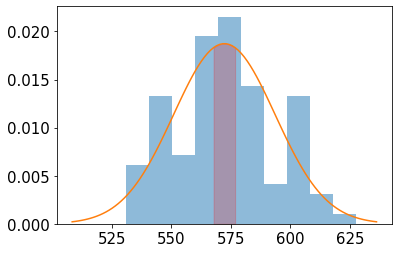

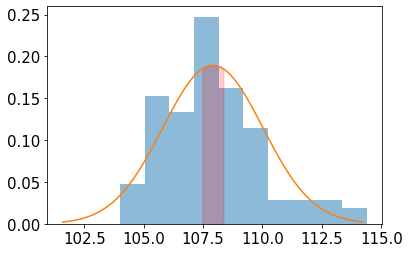

In [257]:
plotDistribution(simulationBatches[0].inspectionTimes)
plotDistribution(simulationBatches[-1].inspectionTimes)

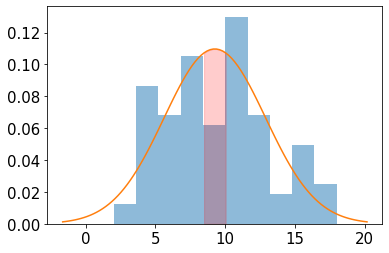

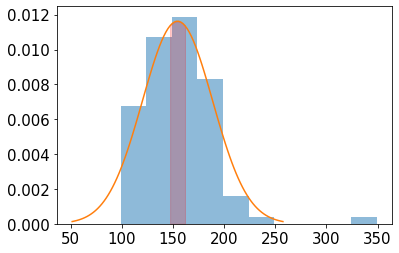

In [258]:
plotDistribution(simulationBatches[0].collisionNumbers)
plotDistribution(simulationBatches[-1].collisionNumbers)